In [26]:
import numpy as np

Linear Regression

In [28]:
class Linear_Regression():
    #to initiate the parameters(learning rate and no. of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    #to train the model with the dataseet 
    #m = no.of data points(rows) and n = no.of features(cols), here we don't consider salary as it is target value 
    #number of training examples and number of features  
    def fit(self, X, Y):
        self.m, self.n = X.shape
    #initiating the weight and bias
    #X = no.of years of exp
    #Y = Salary
        self.w = np.zeros(self.n) #numpy array
        self.b = 0
        self.X = X
        self.Y = Y
    #implementing gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()
            
    #updating the parameters with gradient descent
    def update_weights(self):
        Y_prediction = self.predict(self.X)
    #calculate gradients
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m   #transpose of the matrix - X.T
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    #updating the weights
        self.w  = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
        
    #predict salary based on the experience 
    def predict(self, X):
    #if we give no.of exp, it will try to find the salary
        return X.dot(self.w) + self.b #dot product as w is a numpy array(product of two vectors) - Y = W.X + b

Workflow for a Linear Regression model

1. Set Learning Rate and No. Of Iterations, Initiate Random weight and bias value.
2. Build Linear Regression Equation y = wx + b
3. Find the y pred value for the given value of x for the corresponding weight and bias.
4. Check the loss function for these parameter values. (difference between y pred and true y)
5. Update the parameter values using the gradient descent.
6. Steps 3,4,5 are repeated until we get the minimum loss function.
Finally, we get the best model(best weight and best bias value) as it is minimum loss function. 

Using Linear Regression Model for Prediction

In [29]:
#importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [30]:
#loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv('salary_data.csv')

In [31]:
#printing the first five cols and the last five cols of the df
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [13]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [32]:
#number of rows and cols in the dataframe
salary_data.shape

(30, 2)

In [33]:
#checking if there are any missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature and the target

In [34]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [19]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [35]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the data into training data and test data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 2)

Training the linear regression model

In [37]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [38]:
model.fit(X_train,Y_train)

In [41]:
#printing the parameter values
print('weight = ', model.w[0])
print('model = ', model.b)

weight =  9514.400999035135
model =  23697.406507136307


Predicting the salary value for test data

In [43]:
test_data_prediction = model.predict(X_test)

In [44]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualising the predicted values and the actual values

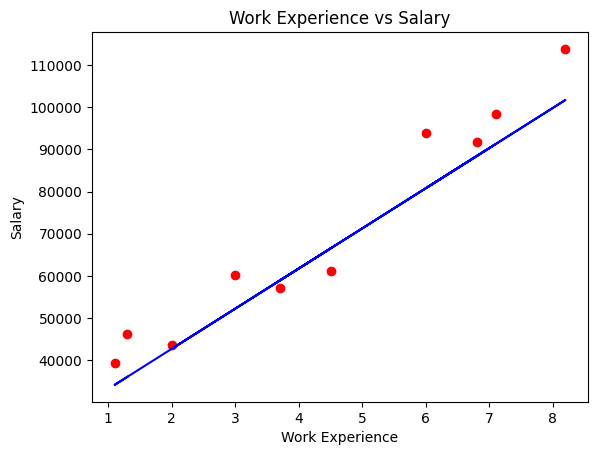

In [51]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Work Experience vs Salary')
plt.show()